Fonte de dados: https://sig.tse.jus.br/ords/dwapr/seai/r/sig-eleicao-resultados/conjuntos-de-dados

Os dados foram exportados foram:
 - Métricas: Quantidade de votos nominais
 - Dimensões: UF, Município, Número do candidato
 - Tipo de Arquivo: CSV (en-US)

In [99]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [100]:
# Dados primeiro turno
df_raw_first_round = pd.read_csv('data/raw-first-round.csv')
print(df_raw_first_round.shape)
print(df_raw_first_round.dtypes)
display(df_raw_first_round[df_raw_first_round['nm_municipio'] == 'ARARANGUÁ'])

(63261, 5)
sg_uf                object
nm_municipio         object
nr_candidato          int64
qt_votos_nominais     int64
dt_carga             object
dtype: object


,sg_uf,nm_municipio,nr_candidato,qt_votos_nominais,dt_carga
48730,SC,ARARANGUÁ,12,1009,2022-11-25 18:45:37
48731,SC,ARARANGUÁ,13,11852,2022-11-25 18:45:37
48732,SC,ARARANGUÁ,14,37,2022-11-25 18:45:37
48733,SC,ARARANGUÁ,15,1516,2022-11-25 18:45:37
48734,SC,ARARANGUÁ,16,11,2022-11-25 18:45:37
48735,SC,ARARANGUÁ,21,15,2022-11-25 18:45:37
48736,SC,ARARANGUÁ,22,25630,2022-11-25 18:45:37
48737,SC,ARARANGUÁ,27,4,2022-11-25 18:45:37
48738,SC,ARARANGUÁ,30,345,2022-11-25 18:45:37
48739,SC,ARARANGUÁ,44,110,2022-11-25 18:45:37


In [101]:
# Dados segundo turno
df_raw_second_round = pd.read_csv('data/raw-second-round.csv')
print(df_raw_second_round.shape)
print(df_raw_second_round.dtypes)
display(df_raw_second_round[df_raw_second_round['nm_municipio'] == 'ARARANGUÁ'])

(11502, 5)
sg_uf                object
nm_municipio         object
nr_candidato          int64
qt_votos_nominais     int64
dt_carga             object
dtype: object


,sg_uf,nm_municipio,nr_candidato,qt_votos_nominais,dt_carga
8860,SC,ARARANGUÁ,13,12522,2022-11-25 18:45:37
8861,SC,ARARANGUÁ,22,28631,2022-11-25 18:45:37


In [102]:
# Junção em uma tabela apenas

# Primeiro turno

df_first_round = df_raw_first_round.drop(['dt_carga'], axis=1)

df_first_round_13 = (df_first_round[df_first_round['nr_candidato'] == 13]
	.copy(deep=True)
	.rename(columns={'qt_votos_nominais': 'qt_votos_13_primeiro_turno'})
	.drop(['nr_candidato'], axis=1))

df_first_round_22 = (df_first_round[df_first_round['nr_candidato'] == 22]
	.copy(deep=True)
	.rename(columns={'qt_votos_nominais': 'qt_votos_22_primeiro_turno'})
	.drop(['nr_candidato'], axis=1))

df_first_round_unified = pd.merge(df_first_round_13, df_first_round_22, on=['sg_uf', 'nm_municipio'])

# Segundo turno

df_second_round = df_raw_second_round.drop(['dt_carga'], axis=1)

df_second_round_13 = (df_second_round[df_second_round['nr_candidato'] == 13]
	.copy(deep=True)
	.rename(columns={'qt_votos_nominais': 'qt_votos_13_segundo_turno'})
	.drop(['nr_candidato'], axis=1))

df_second_round_22 = (df_second_round[df_second_round['nr_candidato'] == 22]
	.copy(deep=True)
	.rename(columns={'qt_votos_nominais': 'qt_votos_22_segundo_turno'})
	.drop(['nr_candidato'], axis=1))

df_second_round_unified = pd.merge(df_second_round_13, df_second_round_22, on=['sg_uf', 'nm_municipio'])

# Junção dos turnos

df_votes = pd.merge(df_first_round_unified, df_second_round_unified, on=['sg_uf', 'nm_municipio'])


# df_first_round = (df_raw_first_round
# 	.drop(['dt_carga'], axis=1)
# 	.rename(columns={'qt_votos_nominais': 'qt_votos_primeiro_turno'}))

# df_second_round = (df_raw_second_round
# 	.drop(['dt_carga'], axis=1)
# 	.rename(columns={'qt_votos_nominais': 'qt_votos_segundo_turno'}))

# df_votes = pd.merge(df_first_round, df_second_round, how='left')
# df_votes['qt_votos_segundo_turno'] = (df_votes['qt_votos_segundo_turno']
# 	.fillna(0)
# 	.astype(np.int64))

print(df_votes.shape)
print(df_votes.dtypes)
display(df_votes.head(10))
display(df_votes[df_votes['nm_municipio'] == 'ARARANGUÁ'])



(5751, 6)
sg_uf                         object
nm_municipio                  object
qt_votos_13_primeiro_turno     int64
qt_votos_22_primeiro_turno     int64
qt_votos_13_segundo_turno      int64
qt_votos_22_segundo_turno      int64
dtype: object


,sg_uf,nm_municipio,qt_votos_13_primeiro_turno,qt_votos_22_primeiro_turno,qt_votos_13_segundo_turno,qt_votos_22_segundo_turno
0,AC,ACRELÂNDIA,1516,5238,1460,5317
1,AC,ASSIS BRASIL,2003,2694,1895,2717
2,AC,BRASILÉIA,4171,9143,3958,9593
3,AC,BUJARI,2130,4505,1958,4693
4,AC,CAPIXABA,1630,3944,1497,3963
5,AC,CRUZEIRO DO SUL,10770,30977,9733,31936
6,AC,EPITACIOLÂNDIA,2592,6494,2464,6729
7,AC,FEIJÓ,7930,6191,7113,6383
8,AC,JORDÃO,2213,1515,1980,1433
9,AC,MANOEL URBANO,2095,3141,2047,2889


,sg_uf,nm_municipio,qt_votos_13_primeiro_turno,qt_votos_22_primeiro_turno,qt_votos_13_segundo_turno,qt_votos_22_segundo_turno
4430,SC,ARARANGUÁ,11852,25630,12522,28631


In [103]:
# Salvando os dados

# df_votes.to_csv('data/votes.csv')

# Exploração dos dados

<AxesSubplot: title={'center': 'Votos por estado'}, xlabel='Estados', ylabel='Votos (em milhões)'>

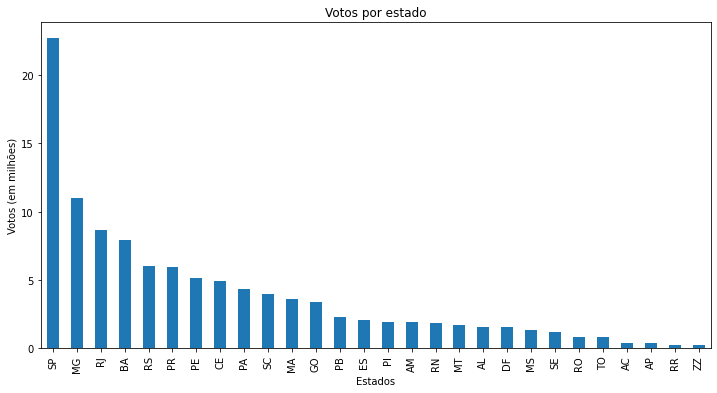

In [104]:
df_total_votes_uf_muni = df_votes.copy(deep=True)[['sg_uf', 'nm_municipio']]
df_total_votes_uf_muni['qt_votos_primeiro_turno'] = df_votes['qt_votos_13_primeiro_turno'] + df_votes['qt_votos_22_primeiro_turno']
df_total_votes_uf_muni['qt_votos_segundo_turno'] = df_votes['qt_votos_13_segundo_turno'] + df_votes['qt_votos_22_segundo_turno']

votes_by_state = ((df_total_votes_uf_muni
 	.groupby(['sg_uf'])[['qt_votos_primeiro_turno']]
 	.sum()
 	.sort_values(by='qt_votos_primeiro_turno', ascending=False)) / 10**6)

votes_by_state.plot(
	kind='bar',
	title='Votos por estado',
	ylabel='Votos (em milhões)',
	xlabel='Estados',
	legend=None,
	figsize=(12, 6)
)


<AxesSubplot: title={'center': 'Votos por município'}, xlabel='Municípios', ylabel='Votos (em milhões)'>

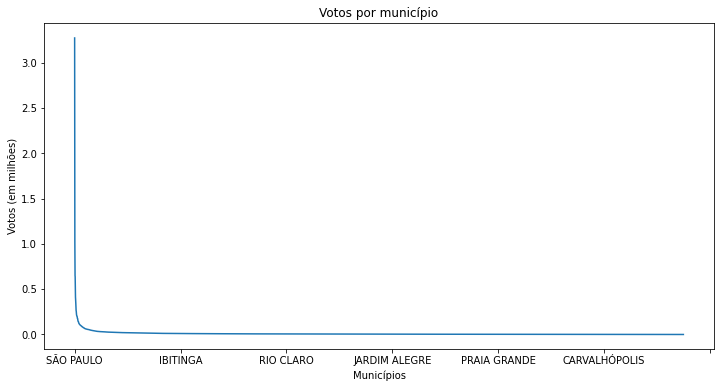

In [105]:
df_total_votes_muni = df_votes.copy(deep=True)[['nm_municipio', 'qt_votos_13_primeiro_turno', 'qt_votos_22_primeiro_turno']]
df_total_votes_muni['qt_votos_13_primeiro_turno'] = df_total_votes_muni['qt_votos_13_primeiro_turno'] / 10**6
df_total_votes_muni['qt_votos_22_primeiro_turno'] = df_total_votes_muni['qt_votos_22_primeiro_turno'] / 10**6

votes_by_mun = df_total_votes_muni.sort_values(by='qt_votos_13_primeiro_turno', ascending=False)

votes_by_mun.plot(
	kind='line',
	title='Votos por município',
	x='nm_municipio',
	y=['qt_votos_13_primeiro_turno'],
	ylabel='Votos (em milhões)',
	xlabel='Municípios',
	legend=None,
	figsize=(12, 6)
)

<AxesSubplot: title={'center': 'Votos fora do Brasil por cidade'}, xlabel='Estados', ylabel='Votos'>

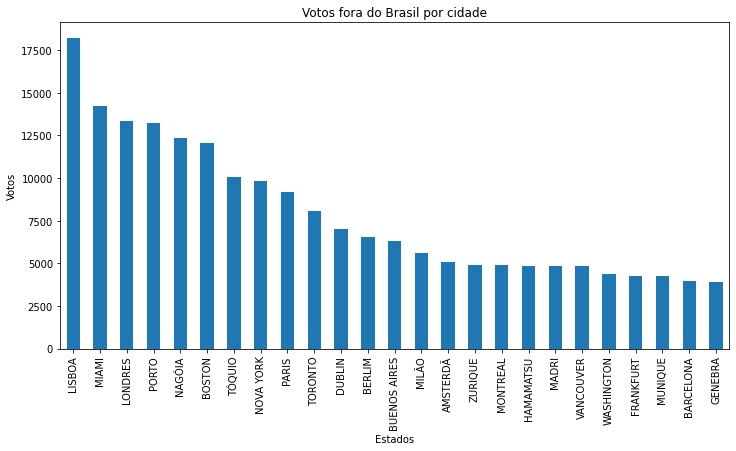

In [106]:
# https://www.gov.br/mre/pt-br/consulado-nagoia/eleicoes-2022-1/locais-de-votacao/nagoia

votes_outsize_brasil = ((df_total_votes_uf_muni[df_total_votes_uf_muni['sg_uf'] == 'ZZ']
	.groupby(['nm_municipio'])[['qt_votos_primeiro_turno']]
	.sum()
	.sort_values(by='qt_votos_primeiro_turno', ascending=False)
	.head(25)))

votes_outsize_brasil.plot(
	kind='bar',
	title='Votos fora do Brasil por cidade',
	ylabel='Votos',
	xlabel='Estados',
	legend=None,
	figsize=(12, 6)
)



Número de cidades com mais de 80% de votos no Lula: 913
Número de cidades com mais de 80% de votos no Bolsonaro: 44


<AxesSubplot: title={'center': 'Proporção dos votos'}, xlabel='Cidades', ylabel='Proporção dos votos do Lula'>

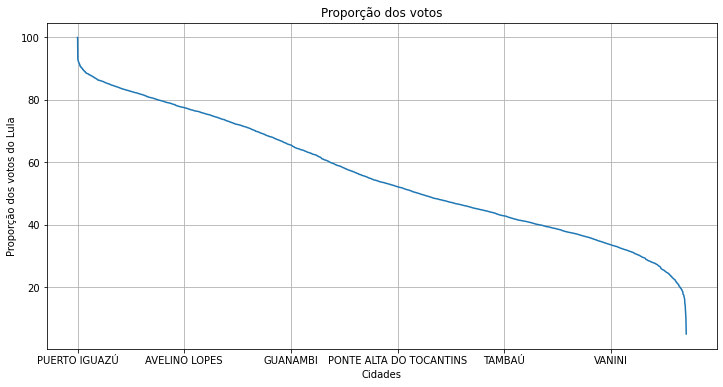

In [107]:
df_proportion = df_votes.copy(deep=True)[['sg_uf', 'nm_municipio']]
df_proportion['proporcao_13_primeiro_turno'] = df_votes['qt_votos_13_primeiro_turno'] / df_total_votes_uf_muni['qt_votos_primeiro_turno'] * 100
df_proportion['proporcao_13_votos_segundo_turno'] = df_votes['qt_votos_13_segundo_turno'] / df_total_votes_uf_muni['qt_votos_segundo_turno'] * 100
df_proportion = df_proportion.dropna() # Cidades que não tiveram votos

print(f'Número de cidades com mais de 80% de votos no Lula: {df_proportion[df_proportion["proporcao_13_primeiro_turno"] > 80].shape[0]}')
print(f'Número de cidades com mais de 80% de votos no Bolsonaro: {df_proportion[df_proportion["proporcao_13_primeiro_turno"] < 20].shape[0]}')

(df_proportion[['nm_municipio', 'proporcao_13_votos_segundo_turno']]
	.sort_values(by='proporcao_13_votos_segundo_turno', ascending=False)
	.plot(
		kind='line', # hist line
		title='Proporção dos votos',
		x='nm_municipio',
		y=['proporcao_13_votos_segundo_turno'],
		ylabel='Proporção dos votos do Lula',
		xlabel='Cidades',
		grid=True,
		legend=None,
		figsize=(12, 6)
	)
)


# Processamento para agrupamento

<AxesSubplot: title={'center': 'Standard Scaler'}, xlabel='Municípios', ylabel='Votos'>

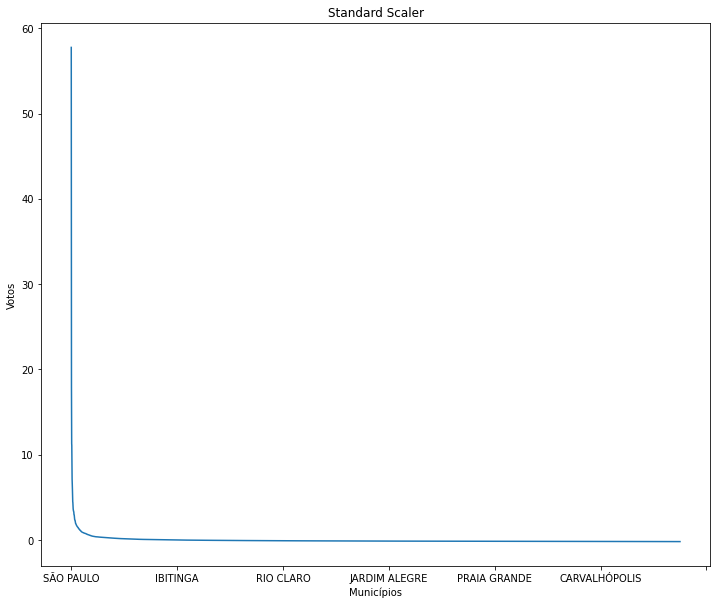

In [108]:
from sklearn import preprocessing

VOTES_COLUMNS = ['qt_votos_13_primeiro_turno', 'qt_votos_22_primeiro_turno', 'qt_votos_13_segundo_turno', 'qt_votos_22_segundo_turno']

votes_scaler = preprocessing.StandardScaler().fit(df_votes[VOTES_COLUMNS])

df_votes_scalled = df_votes.copy(deep=True)
df_votes_scalled[VOTES_COLUMNS] = pd.DataFrame(votes_scaler.transform(df_votes[VOTES_COLUMNS]))
df_votes_scalled = df_votes_scalled.sort_values(by='qt_votos_13_primeiro_turno', ascending=False)

df_votes_scalled.plot(
	kind='line',
	title='Standard Scaler',
	x='nm_municipio',
	y='qt_votos_13_primeiro_turno',
	ylabel='Votos',
	xlabel='Municípios',
	legend=None,
	figsize=(12, 10),
)


<AxesSubplot: title={'center': 'Standard Scaler Log'}, xlabel='Municípios', ylabel='Votos'>

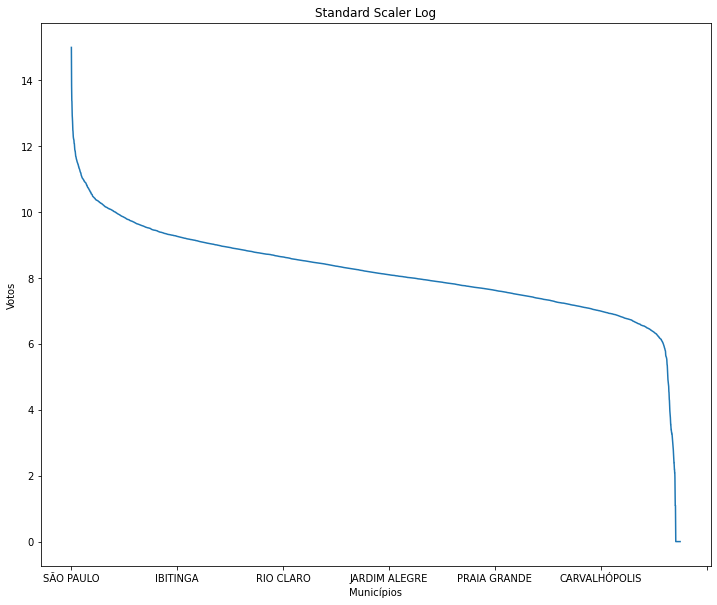

In [109]:
df_votes_log = df_votes.copy(deep=True)
df_votes_log[VOTES_COLUMNS] = pd.DataFrame(
	preprocessing.FunctionTransformer(np.log1p).fit_transform(
		df_votes[VOTES_COLUMNS]
	)
)
df_votes_log = df_votes_log.sort_values(by='qt_votos_13_primeiro_turno', ascending=False)

df_votes_log.plot(
	kind='line',
	title='Standard Scaler Log',
	x='nm_municipio',
	y='qt_votos_13_primeiro_turno',
	ylabel='Votos',
	xlabel='Municípios',
	legend=None,
	figsize=(12, 10),
)


In [122]:
from sklearn.preprocessing import LabelEncoder

df_votes = df_votes_log.copy(deep=True)
#df_votes = df_votes_scalled.copy(deep=True)

label_encoder_municipio = LabelEncoder().fit(df_votes['nm_municipio'])
df_votes['nm_municipio'] = label_encoder_municipio.transform(df_votes['nm_municipio'])

label_encoder_estado = LabelEncoder().fit(df_votes['sg_uf'])
df_votes['sg_uf'] = label_encoder_estado.transform(df_votes['sg_uf'])

df_votes.head()

,sg_uf,nm_municipio,qt_votos_13_primeiro_turno,qt_votos_22_primeiro_turno,qt_votos_13_segundo_turno,qt_votos_22_segundo_turno
5358,25,4897,15.002290,14.778148,15.117858,14.975997
3660,18,4118,14.265621,14.343652,14.366034,14.472621
535,4,4243,13.837985,12.814351,13.901597,13.019515
677,5,1767,13.594876,13.180940,13.688313,13.358241
803,6,701,13.384012,13.721637,13.499835,13.856011


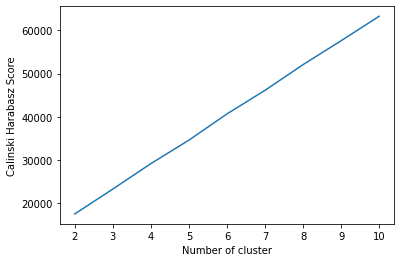

In [123]:
# https://scikit-learn.org/stable/_static/ml_map.png

from sklearn import metrics
from sklearn.cluster import KMeans

TRAIN_DATA_COLUMNS = ['nm_municipio', *VOTES_COLUMNS]

calinski_harabasz_score = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(df_votes[TRAIN_DATA_COLUMNS])
    label = kmeans.labels_
    calinski_harabasz_score[k] = metrics.calinski_harabasz_score(df_votes[TRAIN_DATA_COLUMNS], label)

plt.figure()
plt.plot(list(calinski_harabasz_score.keys()), list(calinski_harabasz_score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Calinski Harabasz Score")
plt.show()

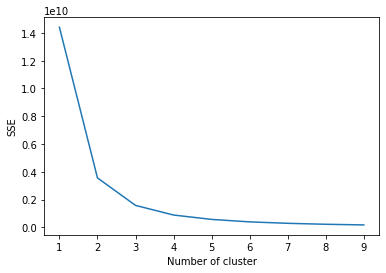

In [124]:

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=2000).fit(df_votes[TRAIN_DATA_COLUMNS])
    sse[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [125]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_votes[TRAIN_DATA_COLUMNS])
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4
0,913.880582,8.172637,7.778765,8.202898,7.897429
1,4563.282451,8.139549,7.793077,8.170506,7.910739
2,2752.311743,8.192374,7.822554,8.223643,7.937697


Text(0.5, 1.0, 'Axis [1, 1]')

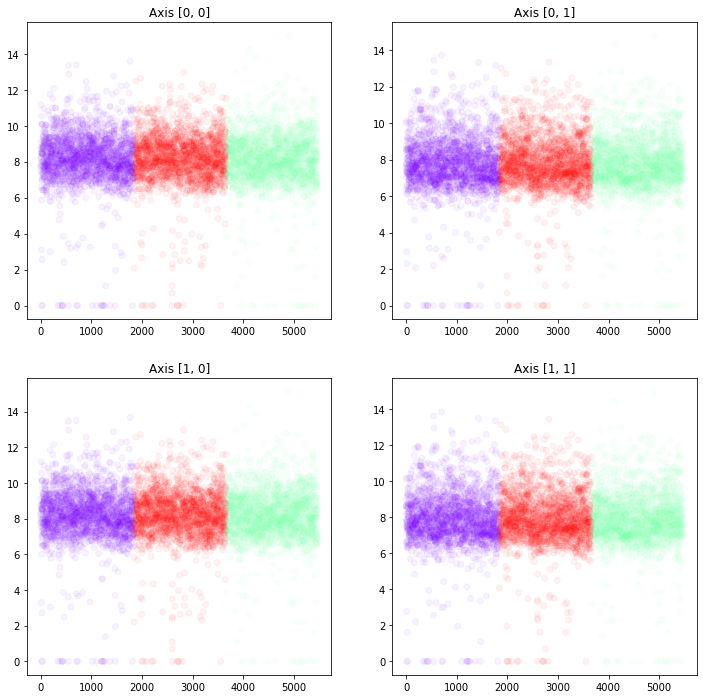

In [128]:
prediction = kmeans.predict(df_votes[TRAIN_DATA_COLUMNS])

np_votes = df_votes.to_numpy()

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

ALPHA = 0.05

axs[0, 0].scatter(np_votes[:, 1], np_votes[:, 2], c=prediction, cmap='rainbow', alpha=ALPHA)
axs[0, 0].set_title('Axis [0, 0]')

axs[0, 1].scatter(np_votes[:, 1], np_votes[:, 3], c=prediction, cmap='rainbow', alpha=ALPHA)
axs[0, 1].set_title('Axis [0, 1]')

axs[1, 0].scatter(np_votes[:, 1], np_votes[:, 4], c=prediction, cmap='rainbow', alpha=ALPHA)
axs[1, 0].set_title('Axis [1, 0]')

axs[1, 1].scatter(np_votes[:, 1], np_votes[:, 5], c=prediction, cmap='rainbow', alpha=ALPHA)
axs[1, 1].set_title('Axis [1, 1]')



# ax1.xaxis.set_ticklabels([])
# ax1.yaxis.set_ticklabels([])
# ax1.set_xlabel("Cidades")
# ax1.set_ylabel("Votos primeiro turno")
# ax1.set_title('Distribuição de votos')
